In [ ]:
import pandas as pd
import numpy as np
import plotly.express as pltx
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv("/TravelInsurancePrediction.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


* Age- Age Of The Customer
* Employment Type- The Sector In Which Customer Is Employed
* GraduateOrNot- Whether The Customer Is College Graduate Or Not
* AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
* FamilyMembers- Number Of Members In Customer's Family
* ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
* EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
* TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [ ]:
# Drop dummy variable Unnamed: 0 
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.describe(include='all')

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000
unique,NaN,2,2,NaN,NaN,NaN,2,2,NaN
top,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN
freq,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN
mean,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323
std,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332
min,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000
25%,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000
50%,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000
75%,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000


In [ ]:
stringdata=df.select_dtypes(include="object")
for column in stringdata:
    print(stringdata[column].value_counts())
    print('-'*20)

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64
--------------------
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64
--------------------
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64
--------------------
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64
--------------------


In [ ]:
numdata=df.select_dtypes(include="int")
for column in numdata:
    print(numdata[column].value_counts())
    print('-'*20)

28    283
34    158
31    148
29    125
33    108
26     91
27     91
25     87
32     67
30     47
35     44
Name: Age, dtype: int64
--------------------
500000     90
800000     86
1100000    74
1400000    73
600000     70
1300000    68
1200000    67
550000     58
900000     57
700000     56
1050000    54
750000     48
1250000    47
850000     46
1150000    43
1000000    36
1500000    36
350000     33
400000     31
300000     31
650000     29
1350000    26
1450000    19
950000     19
1700000    15
1750000    15
450000     12
1800000     4
1550000     4
1650000     2
Name: AnnualIncome, dtype: int64
--------------------
4    275
5    243
3    225
6    186
7    140
2     78
8     52
9     50
Name: FamilyMembers, dtype: int64
--------------------
0    833
1    416
Name: ChronicDiseases, dtype: int64
--------------------
0    766
1    483
Name: TravelInsurance, dtype: int64
--------------------


In [ ]:
#Check duplicated 
df.duplicated().sum()

738

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Amount of people who will take the travel insurance
pltx.pie(df, names='TravelInsurance', color='TravelInsurance', color_discrete_map={1:'#A0CFEC', 0:'#357EC7'}, title='How many customers purchase the insurance?')

In [ ]:
# Create the histograms
pltx.histogram(df, x='Employment Type', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Is employment type important in this equation?')


In [ ]:
pltx.histogram(df, x='AnnualIncome', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Does the annual income play an important role?')

In [ ]:
pltx.histogram(df, x='FamilyMembers', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Big families, small families, who buys the insurance?')

In [ ]:
pltx.histogram(df, x='EverTravelledAbroad', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Long trips require.. insurance!')

In [ ]:
pltx.histogram(df, x='FrequentFlyer', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Frequent flyers, are they frequent customers too?')

In [ ]:
pltx.histogram(df, x='Age', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='When do people travel the most?')

In [ ]:
pltx.histogram(df, x='GraduateOrNot', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='Does education have an impact on the decision?')

In [ ]:
pltx.histogram(df, x='ChronicDiseases', color='TravelInsurance', color_discrete_map={1:'#acc8fc', 0:'#6f6cd4'}, title='How does the health impact the decision?')

In [ ]:
# Extracting the most wealthy age groups and ones with the most people with annual income over 3.5M
age_inc_data = age_over_3m = df[['Age', 'AnnualIncome']]
age_mean_income = age_inc_data[['Age', 'AnnualIncome']].groupby('Age').mean().reset_index()

age_highest_inc = age_inc_data[age_inc_data['AnnualIncome'] > 1300000].groupby('Age').size().reset_index(name='counts')

# Create the plots
pltx.bar(age_mean_income, x='Age', y='AnnualIncome', color_discrete_sequence=['#6f6cd4'], title='Average income by age.')

In [ ]:
pltx.bar(age_highest_inc, x='Age', y='counts', color_discrete_sequence=['#6f6cd4'], title='Which age group has the most people who earn >1.3M?')

In [ ]:
pltx.histogram(df, x='AnnualIncome', color='Employment Type', color_discrete_map={'Government Sector':'#acc8fc', 'Private Sector/Self Employed':'#6f6cd4'}, title='Annual income and employemnt type.')

In [ ]:
pltx.histogram(df, x='FrequentFlyer', color='Employment Type', color_discrete_map={'Government Sector':'#acc8fc', 'Private Sector/Self Employed':'#6f6cd4'}, title='Who flies more frequently?')

In [ ]:
pltx.histogram(df, x='Age', color='Employment Type', color_discrete_map={'Government Sector':'#acc8fc', 'Private Sector/Self Employed':'#6f6cd4'}, title='The age range of the gov. sector.')

In [ ]:
gov_emp = df.index[df['Employment Type'] == 'Government Sector'].tolist()
prv_emp = df.index[df['Employment Type'] == 'Private Sector/Self Employed'].tolist()
high_inc = df.index[(df['AnnualIncome'] > 1300000) & (df['Age'] > 26) & (df['Age'] < 34)].tolist()

corr_gov = list(set(gov_emp).intersection(high_inc))
corr_prv = list(set(prv_emp).intersection(high_inc))
print(len(corr_gov), 'of', len(gov_emp), 'gov. employees have an income higher than 1.3M')
print(len(corr_prv), 'of', len(prv_emp), 'prv. employees have an income higher than 1.3M')

12 of 373 gov. employees have an income higher than 1.3M
86 of 876 prv. employees have an income higher than 1.3M


In [ ]:
pltx.histogram(df, x='AnnualIncome', color='FrequentFlyer', color_discrete_map={'Yes':'#acc8fc', 'No':'#6f6cd4'}, title='Rich people are closer to the sky.')

In [ ]:
pltx.histogram(df, x='EverTravelledAbroad', color='FrequentFlyer', color_discrete_map={'Yes':'#acc8fc', 'No':'#6f6cd4'}, title='Frequency of air travel vs going abroad.')

In [ ]:
pltx.histogram(df, x='AnnualIncome', color='GraduateOrNot', color_discrete_map={'Yes':'#acc8fc', 'No':'#6f6cd4'}, title='Employment type and age.')

In [ ]:
df_chronic=df[df['ChronicDiseases']==1]
df_fly_chronic=df_chronic[df_chronic['Employment Type']=='Private Sector/Self Employed']
df_chronic=df_fly_chronic[df_fly_chronic['TravelInsurance']==0]
df_c=df_chronic[df_chronic['EverTravelledAbroad']=='Yes']
len(df_c)

21

In [ ]:
df_chronic=df[df['FrequentFlyer']=='Yes']
df_fly_chronic=df_chronic[df_chronic['Employment Type']=='Private Sector/Self Employed']
df_chronic=df_fly_chronic[df_fly_chronic['TravelInsurance']==0]
len(df_chronic)

119

In [ ]:
df_chronic=df[df['EverTravelledAbroad']=='Yes']
df_fly_chronic=df_chronic[df_chronic['Employment Type']=='Private Sector/Self Employed']
df_chronic=df_fly_chronic[df_fly_chronic['TravelInsurance']==0]
len(df_chronic)

59

In [ ]:
df_chronic=df[df['EverTravelledAbroad']=='Yes']
df_fly_chronic=df_chronic[df_chronic['Employment Type']=='Private Sector/Self Employed']
df_chronic=df_fly_chronic[df_fly_chronic['TravelInsurance']==1]
len(df_chronic)

144

# Data Preprocessing

### Handle Categorical Data

In [ ]:
# choosing categorical columns
categorical_cols = [c for c in df.columns if df[c].dtype == 'object']

# take the categorical columns of df
df_categorical = df[categorical_cols].copy()

# make dummy variable of categorical columns
for col in categorical_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

In [ ]:
df_categorical

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,0,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,1,0
...,...,...,...,...
1976,0,0,0,0
1981,0,0,0,0
1982,1,0,1,1
1983,1,0,0,1


In [ ]:
# choosing numerical columns
numerical_cols = ['Age', 'AnnualIncome', 'FamilyMembers','TravelInsurance']

df_num = pd.DataFrame((df[numerical_cols].astype('float64')), columns=numerical_cols)

In [ ]:
df_new = pd.concat([df_num, df_categorical], axis=1)
df_new.head()

,Age,AnnualIncome,FamilyMembers,TravelInsurance,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,31.0,400000.0,6.0,0.0,0,0,0,0
1,31.0,1250000.0,7.0,0.0,1,0,0,0
2,34.0,500000.0,4.0,1.0,1,0,0,0
3,28.0,700000.0,3.0,0.0,1,0,0,0
4,28.0,700000.0,8.0,0.0,1,0,1,0


Text(0.5, 1.0, 'Features Correlation')

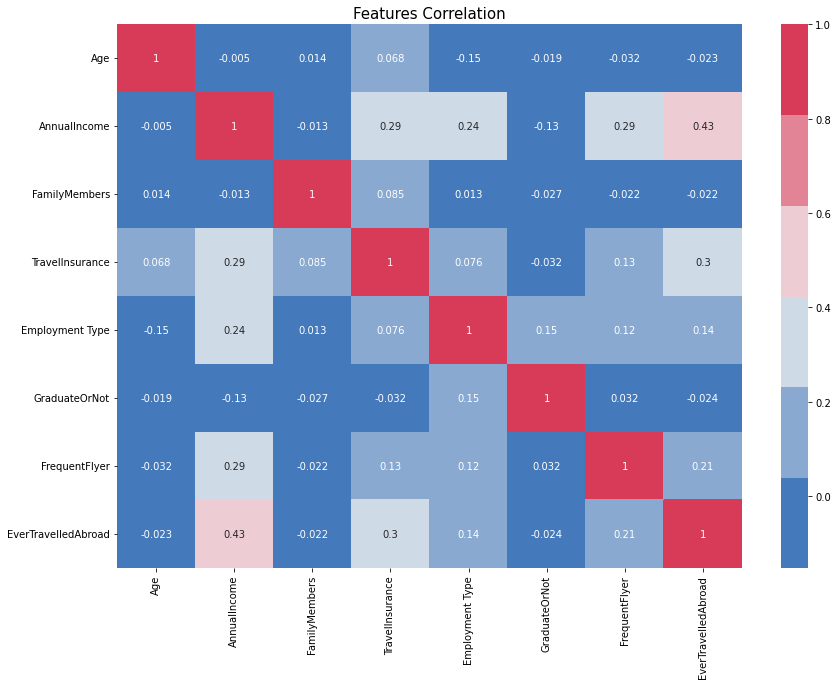

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color=sns.diverging_palette(250,6)

plt.figure(figsize=(14,10))
sns.heatmap(df_new.corr(),cmap=color,annot=True)
plt.title("Features Correlation", fontsize=15)

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split


X = df_new.drop(columns='TravelInsurance').to_numpy()
y = df_new[['TravelInsurance']].to_numpy()
y = y.reshape(len(y),) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Handle Imbalance Data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=1) 
                     
X_smote, y_smote = under.fit_resample(X_train, y_train)

In [ ]:
len(X_smote)

766

# Modelling

## Train Model

Accuracy: 0.724
------
Confusion Matrix:

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78       150
         1.0       0.69      0.57      0.62       100

    accuracy                           0.72       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.72      0.72      0.72       250

------
Assuming 1 as positive, we get:

True Positive: 57
True Negative: 124
False Positive: 26
False Negative: 43

Precision: 0.6867469879518072
Recall: 0.57
F1-Score: 0.6229508196721312


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



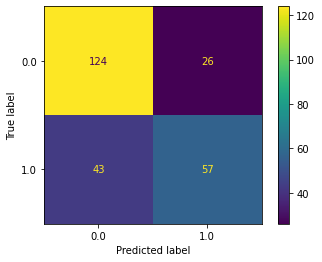

Accuracy: 0.588
------
Confusion Matrix:

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64       150
         1.0       0.49      0.57      0.53       100

    accuracy                           0.59       250
   macro avg       0.58      0.58      0.58       250
weighted avg       0.60      0.59      0.59       250

------
Assuming 1 as positive, we get:

True Positive: 57
True Negative: 90
False Positive: 60
False Negative: 43

Precision: 0.48717948717948717
Recall: 0.57
F1-Score: 0.5253456221198157


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



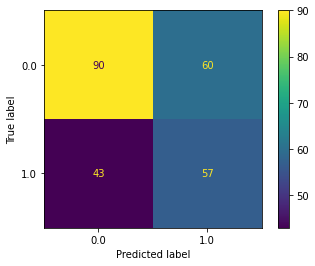

Accuracy: 0.636
------
Confusion Matrix:

              precision    recall  f1-score   support

         0.0       0.70      0.69      0.69       150
         1.0       0.54      0.56      0.55       100

    accuracy                           0.64       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.64      0.64      0.64       250

------
Assuming 1 as positive, we get:

True Positive: 56
True Negative: 103
False Positive: 47
False Negative: 44

Precision: 0.5436893203883495
Recall: 0.56
F1-Score: 0.5517241379310345


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



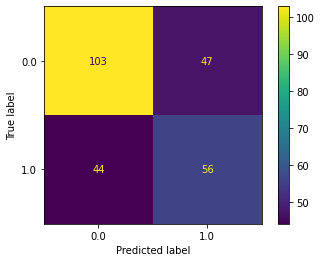

In [ ]:
from sklearn import model_selection as ms, ensemble, linear_model, naive_bayes, neighbors, tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

MLA=[
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       naive_bayes.GaussianNB(),
]

name = []
testscore = []

for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_smote, y_smote)
    testscore.append(alg.score(X_test, y_test))
    evaluate(alg)
    plot_confusion_matrix(alg, X_test, y_test)
    plt.show()
    
    
comparison = pd.DataFrame({"name": name, "testscore": testscore})

In [ ]:
comparison

,name,testscore
0,GradientBoostingClassifier,0.724
1,RandomForestClassifier,0.588
2,GaussianNB,0.636


In [ ]:
def evaluate(model, x_test = X_test, y_test = y_test):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

# 